# Tour por Colombia


### Descripción del problema:
Un grupo de estudiantes se acercó a la agencia Férreo Travel con el anhelo de explorar Europa en tren. Aunque contaban con un presupuesto favorable, su principal desafío residía en el escaso tiempo de vacaciones otorgado por la entidad educativa. Manifestaron su interés en recorrer las capitales de los nueve países que más captaron su atención: Italia, Suiza, Francia, Alemania, Bulgaria, Macedonia, Hungría, Ucrania y Polonia. Solicitaron un itinerario ferroviario eficiente en términos de duración, permitiéndoles aprovechar al máximo su breve intervalo de tiempo y disfrutar completamente de los destinos seleccionados. Ahora la agencia se pregunta ¿Qué rutas deben tomar los estudiantes para que los trayectos entre países tengan la menor duración?, además también deben organizar el tiempo de estadía en cada lugar para así estar a tiempo el día de retornar a clases, por lo que también se cuestionan ¿Aproximadamente cuánto tiempo les tomara en total únicamente viajando entre las capitales sin contar el viaje de regreso?.

### Modelo de grafos:
Para el desarrollo de una solución al problema propuesto fue necesario la implementación de una matriz de pesos propia de la teoria de grafos dirigidos y no dirigidos, encargada de señalar la existencia de relaciones o aristas entre los distintos nodos del grafo y sobre la cual se trabajará pues como característica principal en el enunciado del problema, un aspecto para tener en cuenta son las ponderaciones del grafo. Por otro lado, para la representación grafica del grafo fue utilizado una librería del lenguaje PYTHON la cual permite distribuir y relacionar los nodos en un espacio coordenado.

### Algoritmo candidato para la solución:

En esta solución fue implementado el algoritmo de Kruskal, este es un algoritmo utilizado sobre grafos no dirigidos y ponderados cuya función es encontrar el Árbol Recubridor Mínimo (ARM), el cual consiste en un árbol que conecte a todos los nodos del grafo sin generar ningún bucle; se decidió emplearlo pues se adapta a las condiciones descritas en la descripción de la problemática pues se desea pasar por cada ciudad una única vez y escogiendo los trayectos con menor duración (ponderaciones). La lógica de este algoritmo ira de la mano con la antes mencionada matriz de pesos, pues sobre ella se evaluaran y escogerán aquellas aristas de menor ponderación.


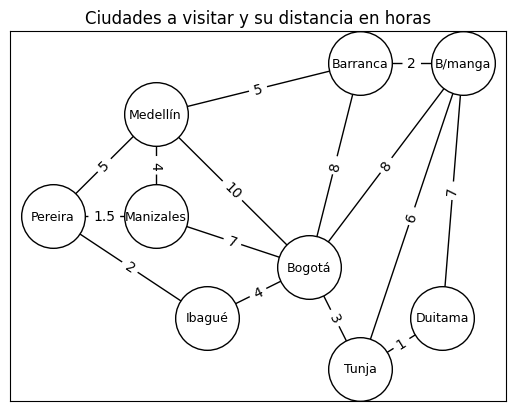



Bienvenido, este es su recorrido:

La duracion total aproximada de la ruta es de 22.5 horas


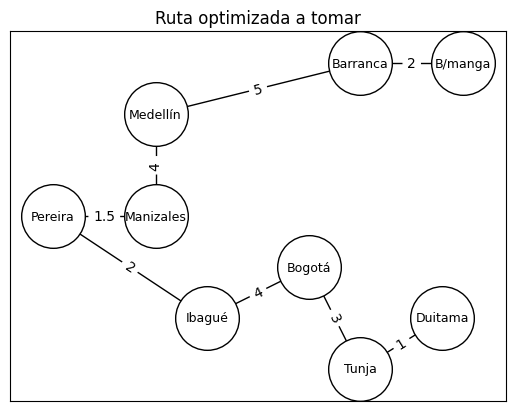

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

class MatrizPesos:
    def __init__(self, nodos): #Constructor de una matriz de pesos
        self.V = nodos    #Numero de vertices
        self.A = 0        #Numero de aristas
        self.matrizPesos = [[0] * nodos for _ in range(nodos)]   #Matriz de ponderaciones
    def getV(self):
        return self.V

    def getA(self):
        return self.A

    def getMatrizPesos(self):
        return self.matrizPesos

    def enlazarNodosConPeso(self, u, v, w):    #Metodo que crea una arista entre dos nodos con su peso
        self.matrizPesos[u][v] = w
        self.matrizPesos[v][u] = w
        self.A += 1

    def imprimirMatriz(self):   #Metodo para imprimir la matriz
        for i in range(self.V):
            print(f"{i}: ", end="")
            for j in range(self.V):
                print(f"{self.matrizPesos[i][j]} ", end="")
            print("")

    def completarPesos(self):      #Metodo para completar pesos, es decir, no dejar en 0 aquellos nodos que no se relacionan sino en -1.
        for i in range(self.V):
            for j in range(self.V):
                if self.matrizPesos[i][j] == 0 and j != i:
                    self.matrizPesos[i][j] = -1

class AlgKruskal:
    def __init__(self, matriz, verti):   # Constructor del algoritmo de kruskal
        self.pesoMin = 0         #Peso total minimo del ARM
        self.vectolDestinos = [0] * verti    #Vector que contendra los nodos destino ya recorridos
        self.Matriz = matriz     #Matriz de pesos del grafo
        self.vertices = verti     #Numero de vertices del grafo

    def arbolRecubridorMin(self):  #Metodo del algoritmo que encuentra el ARM
        Grafo2=nx.Graph()  #Creacion del grafico en un plano cartesiano

        pos = {"B/manga": (5, 0.09), "Bogotá": (2, 0.05), "Medellín": (-1, 0.08), "Pereira": (-3, 0.06), "Barranca": (3, 0.09), "Manizales":(-1,0.06),
       "Ibagué":(0,0.04), "Tunja":(3,0.03), "Duitama":(4.6,0.04)}  #Posiciones en el plano de los nodos
        opciones = {   #Detalles de edicion para las fuentes
            "font_size": 9,
            "node_size": 2100,
            "node_color": "white",
            "edgecolors": "black",
            "linewidths": 1,
            "width": 1,
        }

        a = 100  #Entero que ayudara a establecer la arista con menor peso en el grafo
        c = 0   #Entero que ayudara a saber cuantas veces se repite el proceso del algoritmo
        pro = 0
        dest = 0  #Enteros que me indican la procedencia y destino de la arista escogida
        print("Bienvenido, este es su recorrido:")
        while c < self.vertices - 1:    #Condicion que finaliza el algoritmo cuando el arbol recubridor minimo tenga "v-1" aristas siendo "v" el numero de nodos
            for i in range(self.vertices):
                for j in range(self.vertices):
                    if self.Matriz[i][j]>0  and  self.Matriz[i][j]<a:   #Busco la arista de menor peso en todo el grafo
                        a = self.Matriz[i][j]    # Guardo su ponderacion, nodo destino y origen
                        pro = i
                        dest = j
            if self.Verificar(dest):   #Verifico si el nodo que es destino ya fue recorrido antes
                if not self.Verificar(pro):  #Ahora verifico si el nodo origen de la arista tambien fue recorrido antes
                    self.vectolDestinos[c] = pro   #Añado el nodo origen al vector de destinos en caso de que no este
                    self.Matriz[pro][dest] = 0  #"Elimino" esa arista pues ya se que es la de menor peso, no la necesito mas; tengo guardado sus nodos y peso
                    self.Matriz[dest][pro] = 0
                    c += 1  #Aumento el numero de aristas del ARM
                    self.pesoMin += a  #Sumo el peso de la arista al peso del ARM
                    Grafo2.add_edge(dc[pro], dc[dest],weight=a) #Agrego los nodos, arista y peso al nuevo grafo que representara la solucion del problema
                    a = 100  #Inicializo otra vez en 100 para repetir el proceso de busqueda
                else:    #Si salto a este condicional quiere decir que la arista seleccionada me generaba un ciclo
                    self.Matriz[pro][dest] = 0  #Elimino la arista
                    self.Matriz[dest][pro] = 0
                    a = 100 #Inicializo otra vez en 100 para repetir el proceso de busqueda
            else:
                self.vectolDestinos[c] = dest   #Como el nodo destino no se encontraba entre los nodos ya recorridos, lo agrego
                self.Matriz[pro][dest] = 0   #"Elimino" esa arista pues ya se que es la de menor peso, no la necesito mas; tengo guardado sus nodos y peso
                self.Matriz[dest][pro] = 0
                c += 1  #Aumento el numero de aristas del ARM
                self.pesoMin += a   #Sumo el peso de la arista al peso del ARM
                Grafo2.add_edge(dc[pro], dc[dest],weight=a)  #Agrego los nodos, arista y peso al nuevo grafo que representara la solucion del problema
                a = 100  #Inicializo otra vez en 100 para repetir el proceso de busqueda
        print("")
        print("La duracion total aproximada de la ruta es de " + str(self.pesoMin)+" horas")
        nx.draw_networkx(Grafo2, pos, **opciones)    #Metodos de la libreria networkX para imprimir el grafo en pantalla
        labels = nx.get_edge_attributes(Grafo2, 'weight')
        nx.draw_networkx_edge_labels(Grafo2, pos, edge_labels=labels)
        plt.title("Ruta optimizada a tomar")
        plt.show()

    def Verificar(self, destino):  #Metodo que me permite verificar si un nodo ya fue destino antes
        for i in range(len(self.vectolDestinos)):
            if destino == self.vectolDestinos[i]:
                return True
        return False

# ---------------------//------------------ Ejecución del programa principal--------//-----------//--------------//----------------//----------//-----//

#Grafica del grafo "mapa" original
Grafo = nx.Graph()
Grafo.add_edge("B/manga", "Bogotá",weight=8)
Grafo.add_edge("B/manga", "Barranca",weight=2)
Grafo.add_edge("B/manga", "Tunja",weight=6)
Grafo.add_edge("B/manga", "Duitama",weight=7)
Grafo.add_edge("Barranca", "Medellín",weight=5)
Grafo.add_edge("Barranca", "Bogotá",weight=8)
Grafo.add_edge("Medellín", "Bogotá",weight=10)
Grafo.add_edge("Medellín", "Manizales",weight=4)
Grafo.add_edge("Medellín", "Pereira",weight=5)
Grafo.add_edge("Manizales", "Bogotá",weight=7)
Grafo.add_edge("Manizales", "Pereira",weight=1.5)
Grafo.add_edge("Pereira", "Ibagué",weight=2)
Grafo.add_edge("Ibagué", "Bogotá",weight=4)
Grafo.add_edge("Duitama", "Tunja",weight=1)
Grafo.add_edge("Tunja", "Bogotá",weight=3)

pos = {"B/manga": (5, 0.09), "Bogotá": (2, 0.05), "Medellín": (-1, 0.08), "Pereira": (-3, 0.06), "Barranca": (3, 0.09), "Manizales":(-1,0.06),
       "Ibagué":(0,0.04), "Tunja":(3,0.03), "Duitama":(4.6,0.04)}  #Posiciones en el plano de los nodos

opciones = {   #Detalles de edicion para las fuentes
    "font_size": 9,
    "node_size": 2100,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}
nx.draw_networkx(Grafo, pos, **opciones)   #Metodos de la libreria networkX para imprimir el grafo en pantalla
labels = nx.get_edge_attributes(Grafo, 'weight')
nx.draw_networkx_edge_labels(Grafo, pos, edge_labels=labels)
plt.title("Ciudades a visitar y su distancia en horas")
plt.show()
print("")

#Creacion del grafo para luego efectuar el algoritmo
matriz = MatrizPesos(9)  #Creacion de la matriz de pesos con el numero de nodos (ciudades) ya conocido
dc = {0:"B/manga",1:"Barranca",2:"Medellín",3:"Manizales",4:"Pereira",
      5:"Ibagué",6:"Bogotá",7:"Tunja",8:"Duitama"} #Diccionario que relaciona un entero con una ciudad para facilitar el proceso del algoritmo de kruskal
#Se relacionan los nodos y sus pesos
matriz.enlazarNodosConPeso(0,1,2)
matriz.enlazarNodosConPeso(0,6,8)
matriz.enlazarNodosConPeso(0,8,7)
matriz.enlazarNodosConPeso(0,7,6)
matriz.enlazarNodosConPeso(1,2,5)
matriz.enlazarNodosConPeso(1,6,8)
matriz.enlazarNodosConPeso(2,6,10)
matriz.enlazarNodosConPeso(2,3,4)
matriz.enlazarNodosConPeso(2,4,5)
matriz.enlazarNodosConPeso(3,4,1.5)
matriz.enlazarNodosConPeso(3,6,7)
matriz.enlazarNodosConPeso(4,5,2)
matriz.enlazarNodosConPeso(5,6,4)
matriz.enlazarNodosConPeso(6,7,3)
matriz.enlazarNodosConPeso(7,8,1)
Algoritmo = AlgKruskal(matriz.matrizPesos,matriz.V)  #Creacion de un Kruskal para el grafo desarrollado
print("")
Algoritmo.arbolRecubridorMin()    #Inicio del proceso de busqueda del ARM
print("")

# Resultados obtenidos:
Al ejecutar la implementacion del algoritmo de Kruskal es posible evidenciar el Arbol Recubridor Minimo (ARM) generado por el algoritmo mostrando asi el trayecto mas optimo que debe seguir Javier para completar satisfactoriamente su viaje sabiendo que al ser de Bucaramanga es allí donde empezara este mismo, adicionalmente se imprime la cantidad de horas totales que gastara aproximadamente en el recorrido de esta ruta.


### Autores:
*   David Fernando Naranjo Rangel 2220046 (J1)
*   Miguel Angel Angulo Duarte 2170812 (J3)
*   Christian Isnardo Orduz Picon 2152104 (J3)
